# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import imgaug as ia
from imgaug import augmenters as iaa
from random import randint
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
sample = X_train[0]
image_shape = sample.shape    

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

13


C:\Users\Maxwell\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


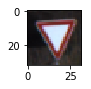

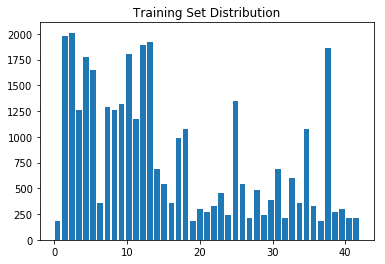

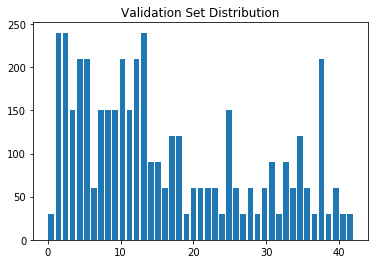

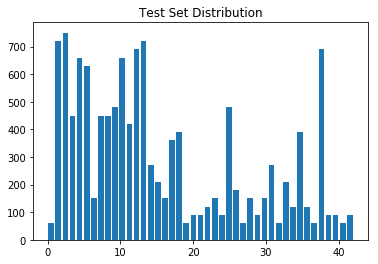

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

#Display random image and displayed image type

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

#Display training data set distribution

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y_train, bins=43, histtype='bar', rwidth=0.8)
plt.title('Training Set Distribution')
fig.show()

#Display validation data set distribution

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y_valid, bins=43, histtype='bar', rwidth=0.8)
plt.title('Validation Set Distribution')
fig.show()

#Display test data set distribution

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y_test, bins=43, histtype='bar', rwidth=0.8)
plt.title('Test Set Distribution')
fig.show()

### Observations from Histograms of Training Data, Validation Data and Test Data sets

The above distributions look unbalanced making it hard for the neural network to generalize effectively.  To get an accurate count of precisely how many training images for each image type are available, I wrote the below helper scripts to count the data types in y_train and output the list. From the training data histogram I was able to determine that data of types 0,6,15,16,19,20,21,22,23,24,26,27,28,29,30,32,33,34,36,37,39,40,41,42 are deficient and need to be increased in order to get better generalization results from the neural network.

Training with poorly distributed training data is like studying for a final exam but spending too much time in specific areas and too little time in other areas. You can expect to ace the sections where time was devoted to studying and perform poorly on parts where little time is spent on researching. When we train our neural network with unbalanced data, it will form a very narrow model of what a particular sign is, and will not be able to accurately identify a sign if the validation image differs by a significant degree from the training data. Providing a more extensive and diverse dataset promotes generalization and "deeper" learning or understanding.

In [4]:
#Checks how many images of a certain calssification are contained within a list
#label = int
#      = classification type to count within the data set
#label_list = list of ints
#           = list of classification labels

def check_count(label, label_list):
    index = 0
    count = 0
    for item in label_list:
        if(label_list[index] == label):
            count+=1
        index+=1
    
    return count

#Checks how many images of multiple types are contain within a list
#labels = list of ints
#       = list of classification types to count within the data set
#label_list = list of ints
#           = list of classification labels

def check_count_mult(labels, label_list):
    ret_list = []
    for item in labels:
        x = check_count(item, label_list)
        ret_list.append(x)
    
    return ret_list

#Takes a list of training data, searches for images and labels that match label and returns those images/labels in a numpy array
def sort_data(label, train_data, train_label):
    index = 0
    count = 0
    ret_list_data = np.zeros(shape=(check_count(label, train_label),32,32,3))
    ret_list_labels = np.zeros(shape=(check_count(label, train_label),1))
    for item in train_label:
        if(train_label[index] == label):
            ret_list_data[count] = train_data[index]
            ret_list_labels[count] = train_label[index]
            count+=1
        index+=1
    
    return ret_list_data, ret_list_labels

#Takes a list of training data, searches for n images by scanning through labels list.Returns n matching images/labels in a numpy array
#label = int
#train_data = numpy array containing training images
#train_label = numpy array containing training labels
def find_data(label, train_data, train_label, n):
    index = 0
    count = 0
    ret_list_data = np.zeros(shape=(n,32,32,3),dtype = np.uint8)
    ret_list_labels = np.zeros(shape=(n,1),dtype = np.uint8)
    for item in train_label:
        if(train_label[index] == label and count < n):
            ret_list_data[count] = train_data[index]
            ret_list_labels[count] = train_label[index]
            count+=1
        index = randint(0, len(train_label)-1)
    
    return ret_list_data, ret_list_labels

#Returns an array of 10 images for each label contained within labels. i.e 10 labels returns 100 images of 10 label types
#this function is used to generate an array of images that will be augmented.
def pics_for_aug(labels, train_data, train_label):
    dim1 = len(labels)*10
    n=10
    ret_list_data = np.zeros(shape=(0,32,32,3),dtype = np.uint8)
    ret_list_labels = np.zeros(shape=(0,1),dtype = np.uint8)
    for item in labels:
        ret_data, ret_labels = find_data(item, train_data, train_label, n)
        ret_list_data = np.vstack((ret_list_data, ret_data))
        ret_list_labels = np.vstack((ret_list_labels, ret_labels))
    
    return ret_list_data, ret_list_labels

In [5]:
num_list = [0,6,15,16,19,20,21,22,23,24,26,27,28,29,30,32,33,34,36,37,39,40,41,42]
x = check_count_mult(num_list, y_train)
for num in range(len(num_list)):  
    print("Number of type ", num_list[num], " training examples =", x[num], "\n")


Number of type  0  training examples = 180 

Number of type  6  training examples = 360 

Number of type  15  training examples = 540 

Number of type  16  training examples = 360 

Number of type  19  training examples = 180 

Number of type  20  training examples = 300 

Number of type  21  training examples = 270 

Number of type  22  training examples = 330 

Number of type  23  training examples = 450 

Number of type  24  training examples = 240 

Number of type  26  training examples = 540 

Number of type  27  training examples = 210 

Number of type  28  training examples = 480 

Number of type  29  training examples = 240 

Number of type  30  training examples = 390 

Number of type  32  training examples = 210 

Number of type  33  training examples = 599 

Number of type  34  training examples = 360 

Number of type  36  training examples = 330 

Number of type  37  training examples = 180 

Number of type  39  training examples = 270 

Number of type  40  training example

## Improving training data distribution through randomized image generation(imgaug lib)

The output from the helper scripts shows that some data types have as little as 180 training samples which are roughly four times less than the samples with the highest image counts. To augment the dataset, I generated a list of 10 images for each of the images with a low training image count. To generate the additional images, I will use the feed the collected images through a randomized image augmentation function. The image augmentation library I am using is titled imgaug; it is a nice tool that has a pip package which makes it easy to add to the carnd-term1 conda environment. Using the imgaug library I will be applying a random brightness augmentation(+/-20%), random scale(+/-5%), random translate(+/-5% x/y), random rotate(+/- 5 degrees), and random shear(-/+4 degrees).

https://github.com/aleju/imgaug

In [6]:
seq = iaa.Sequential([
    iaa.Multiply((0.8, 1.2)),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.95, 1.05), "y": (0.95, 1.05)},
        translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
        rotate=(-5, 5),
        shear=(-4, 4)
    )
], random_order=False) # apply augmenters in random order

In [7]:
count = 0
aug_arr = []
aug_lab = []

num_list = [0,6,15,16,19,20,21,22,23,24,26,27,28,29,30,32,33,34,36,37,39,40,41,42]
#full_list = list(range(43))

pre_aug_pics, aug_labels = pics_for_aug(num_list, X_train, y_train)

print("This is the array of seed pictures that will be fed through the imgaug sequence to generate new training data", np.shape(pre_aug_pics), "\n")
print("This arrary contains the label data for the images which will be fed through the img aug sequence", np.shape(aug_labels), "\n") 

# Creating blank numpy arrays to hold the generated data and corresponding labels

gen_img = np.zeros(shape=(0,32,32,3),dtype = np.uint8)
gen_labels = np.zeros(shape=(0,1),dtype = np.uint8)
    
#print(np.shape(gen_img))
#print(np.shape(gen_labels))


for i in range(50):
    
    images_aug = seq.augment_images(pre_aug_pics)
    gen_img = np.vstack((gen_img, images_aug))
    gen_labels = np.vstack((gen_labels, aug_labels))

print("These are the randomly augmented images", np.shape(gen_img), "\n")
print("These are the correspodning labels", np.shape(gen_labels), "\n")

gen_labels = gen_labels.reshape(12000,)

print("Size of training image and label data prior to merging with randomly augmented trainig data")    
print(np.shape(X_train))
print(np.shape(y_train))

X_train = np.vstack((X_train, gen_img))
y_train = np.concatenate((y_train, gen_labels))

print("Size of training image and label data after merging with randomly augmented training data")
print(np.shape(X_train))
print(np.shape(y_train))

This is the array of seed pictures that will be fed through the imgaug sequence to generate new training data (240, 32, 32, 3) 

This arrary contains the label data for the images which will be fed through the img aug sequence (240, 1) 

These are the randomly augmented images (12000, 32, 32, 3) 

These are the correspodning labels (12000, 1) 

Size of training image and label data prior to merging with randomly augmented trainig data
(34799, 32, 32, 3)
(34799,)
Size of training image and label data after merging with randomly augmented training data
(46799, 32, 32, 3)
(46799,)


C:\Users\Maxwell\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


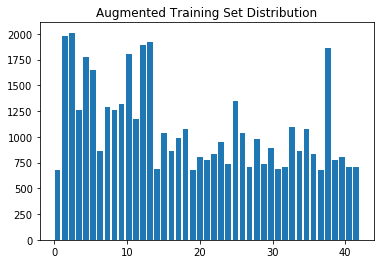

In [8]:
#Display augmented training data set distribution

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y_train, bins=43, histtype='bar', rwidth=0.8)
plt.title('Augmented Training Set Distribution')
fig.show()

The final image augmentation step is to gray scale the images. This is done by adding the RGB channels for each pixel and dividing by 3. The resultant pixel value is the grayscale value. After grayscaling the image, normalization is applied in order to ensure the pixel values fall between zero and one. 

In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

X_train = X_train_gray
X_valid = X_valid_gray

print(np.shape(X_train))
print(np.shape(y_train))


X_train_normalized = (X_train - 128)/128 
X_valid_normalized = (X_valid - 128)/128

X_train = X_train_normalized
X_valid = X_valid_normalized


(46799, 32, 32, 1)
(46799,)


28


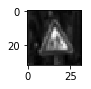

In [10]:
%matplotlib inline

index = random.randint(0, len(X_train_gray))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

In [11]:
#The training data is ordered in sequence, if fed to the nueral network in this manner it will reduce the networks ability to generalize for all image types.

X_train, y_train = shuffle(X_train, y_train)

#Set number of training epochs

EPOCHS = 50

#Set number of images to pass through the nueral network at once

BATCH_SIZE = 128

# Nueral Network learning rate

rate = 0.0005

## Experimenting with the Lenet Architecture

Initially, I experimented with the Lenet architecture from the Lenet lab. I observed that just through data observation and by adding a dropout layer after FC1 that performance against the validation set was around 95%. My rationale for adding a dropout layer was that initially, training accuracy was significantly higher than validation accuracy(~15%). This led me to hypothesize that the model was not generalizing very well. I added a dropout layer to C1, C2, FC1, and FC2. I tried turning each dropout layer on/off independently and noted that the FC2 dropout layer had the most significant impact on improving validation accuracy. Other factors helped reach this validation accuracy. Other factors included augmentation of the dataset, increasing epochs, reducing learning rate. I also briefly played around with increasing the depth of my filters. I noticed this improved performance a tad more to about 95.5%. I was not happy with the amount of improvement achieved by increasing convolutional filter depth on the Lenet architecture so I set out to find an alternative architecture that may provide better results.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Place holder for dropout keep probability, normally within 0.4 - 0.6
keep_prob = tf.placeholder(tf.float32) 

# Place holder for image data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Place holder for lablel data
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, 43)



def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2_drop = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


logits = LeNet(x, 0.6)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
def evaluate(X_data, y_data, keep_p):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))    
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid, 1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))       
        training_accuracy = evaluate(X_train, y_train, 1)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

## The submission provides details of the characteristics and qualities of the architecture, including the type of model used, the number of layers, and the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.

My final architecture which was based on Alexnet consisted of the following 11 layers:

 | -  | Layer   | Description | Data for one image |
  | - | ------------- | ------------- | - |
  |1   | Input  | 32x32x1 Grayscale Image  |1,024 |
  |2   | Conv1 5x5 | 28x28x96 output, 1x1 stride, valid padding  |75,264|
  | -   | Relu  |   |- |
  |3   | Max Pool  | 14x14x96 output, 2x2 stride  |18,816 |
  |4   | Conv2 5x5  | 10x10x256 output, 1x1 stride, valid padding  |25,600 |
  |-    | Relu  |   |- |
  |5   | Max Pool  | 5x5x256 output, 2x2 stride  |6,400 |
  |6   | Conv3 1x1  | 5x5x256 output, 1x1 stride, valid padding  |6,400 |
  |-    | Relu  |   |- |
  |7   | Conv4 1x1  | 5x5x256, 1x1 stride, valid padding |6,400 |
  |-    | Relu  |   |- |
  |8   | Conv5 1x1  | 5x5x256, 1x1 stride, valid padding  |6,400 |
  |-    | Relu  |   |- |
  |-    | Flatten  | 6400x1 output  |6,400 |
  |9   | Fc1  | 120x1 output |120 |
  |10  | Fc2  | 84x1 output |84 |
  | 11 | Fc3  | 43x1 output |43 |
  | - | - | - | 152851 * 4 = 611.8kbytes|
  | - | - | - | Batch = 128 * 611.8 = 78.310MBytes|

Using the same training dataset this architecture achieved higher validation accuracy results. One interesting feature of this model architecture is that it stacks convolution layers directly rather than being seperated by pooling layers as in the LeNet architecture. In order to curtail overfitting, I added dropout layers during training after Conv5 and Fc1. 


## The submission describes how the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.

Cost function

The cost function hyper parameter is the fucntion which training will attempt to minimize. For my neural network I chose the softmax cross entropy cost function. The softmax function outputs the top five confidence rates for an image classifcation result. The confidence rate produced by softmax sum to 1. The top confidence rate is considered the images "classfication" and the other numbers provide insight as to other possible classifcation for the image. 

Optimizer
The optimizer hyperparameter selects which gradient descent algorithm we will use to tweak our weights and biases. Tensorflow makes many differnt optimizers available for use. I chose the Adam(Adaptive Moment Estimation) since it is widely regarded as the fastest optimizer available. More information about the adam optimizer and its benefits can be found here: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

Epochs and Batch Size:
The batch size determines how many images are used in each training epoch. The batch size also directly effects how much GPU memory is used. It's important to calculate how much memory a given batch of images will require since overrunning system memory can lead to system instability. Backpropagation is not performed until the entire batch of images has been processed. This indicates that batch size can have a direct impact on learning. The number of epochs required to train a model changes depending upon many factors such as batch size, learning, rate. Ideally one should stop training the network when loss has leveled out or is no longer increasing or decreasing. I chose an epoch of 100 since this showed to be the point where my loss leveled out. Epoch is not an independent variable and can be influenced by other variables such as learning rate and batch size.

Learning Rate:
I chose a learning rate of 0.0005. I arrived at this learning rate after experimenting with various different rates from .001 to .0001. The learning rate is the amount of change the optimizer can make to the weights and biases of the network. A learning rate that is too large will quickly converge to a high learning rate, but also runs the risk of overshooting and missing the best model. A learning rate that is very low will arrive at the best model but it will do so over many epochs. At the beginning I had trouble understanding what is a "high" vs "low" learning rate. After time I developed an inuition that .001 is a good place to start as not high or low but right in the middle. The lowest training rate I used was .0001 and found that this required 250 epochs to arrive at a model with minimal loss. In the interest of time I did not use this learning rate since training time was greater than one hour on my laptop. 

## The submission describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.

To train the model I used a learning rate of .0005 with 100 epochs and a batch size of 128. In experimenting with the learning rate I observed that a lower rate resulted in higher training accuracy but required higher epochs to reach an acceptable accuracy or minimize loss. The batch size was chosen as 64 due to the amount of available memory in my local GPU.  The Alexnet architecture required more time per epoch than the Lenet architecture. This is due to the increased filter depth of the Alexnet architecture. To adjust the weights and biases of the neural network I used the adam optimizer.

To arrive at the chosen architecture I first experimented with the Lenet architecture to see what kind of results I could get. I was able to achieve greater than 93% validation accuracy with the Lenet architecure if I lowered the training rate really low and increased the epochs to a large number(500). I also noticed that the training accuracy was 10-15% greater than validation accuracy. This indicated to me that the model was overfitting, to help mitigate this I added a dropout layer to FC2. This helped a little but I was ready to try something different.This was an ok result but I wanted to experiment with other architectures that may be able to provide better performance. 

In my research I came across the Alexnet Architecure and it was noted that it was somewhat of a successor to the Lenet architecture. I chose this architecture because it was known to perform well at image classification tasks since it won the 2012 ImageNet challenge. Prior to implementing Lenet I augmented the image data set by applying random brightness, shear, rotate, and scale transformation to generate 1200 new training images/labels. With the augmented data, I implemented and tested Alexnet. The results I saw with large training epochs(300) were as high as 97%. This is an improvement of about 4% compared to Lenet.

Early on when I was using the unmodified training set data I noticed that the training accuracy converged to .999 quickly but the validation accuracy was lagging far behind around .87. This indicated to me that the model was overfitting the model to the training data. In order to help prevent overfitting I added two dropout layers as mentioned previously. In order to find which layer to dropout I tested multiple configuration while capturing results in my notebook. After looking at the resuls over multiple iterations I determined that adding a dropout of .6 to CONV5 and FC1 helped to reduce overfitting.

In order to evaluate the model I aimed for a validation accuracy of greater than 93%. This was achieved by the architecture that I put together. 

Training Accuracy for Alexnet generally converges to 100% within 100 epochs
Validation Accuracy for Alexnet as high as 97% was observed for 300 epochs with .0004 learning rate.
Test Accuracy was 93.5% for Alexnet. This test was only ever run one time to prevent leakage from the test data to the training data.

From the above results we can see that the model exceeds 93% accuracy in the test set. This is impressive to me because these are brand new images that the model has never seen before. The validation and training accuracy also consistently exceed the 93% threshold. 


In [15]:
EPOCHS = 200
BATCH_SIZE = 128
rate = 0.0001
keep_prob = tf.placeholder(tf.float32) 

def AlexNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.001
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x96.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 96), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(96))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x96. Output = 14x14x96.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x256.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 96, 256), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(256))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x96. Output = 5x5x256.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2.1: Convolutional. Output = 5x5x256
    conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 256, 256), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(256))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # SOLUTION: Layer 2.2: Convolutional. Output = 5x5x256
    conv4_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 256, 256), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(256))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv3)
    
    # SOLUTION: Layer 2.3: Convolutional. Output = 5x5x256
    conv5_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 256, 256), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(256))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # SOLUTION: Activation.
    conv5   = tf.nn.relu(conv5)
    conv5   = tf.nn.dropout(conv5, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x256. Output = 400.
    fc0   = flatten(conv5)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)



logits = AlexNet(x, 0.6)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid, 1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))       
        training_accuracy = evaluate(X_train, y_train, 1)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './AlexNet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.048
Training Accuracy = 0.038

EPOCH 2 ...
Validation Accuracy = 0.063
Training Accuracy = 0.067

EPOCH 3 ...
Validation Accuracy = 0.166
Training Accuracy = 0.144

EPOCH 4 ...
Validation Accuracy = 0.231
Training Accuracy = 0.233

EPOCH 5 ...
Validation Accuracy = 0.349
Training Accuracy = 0.342

EPOCH 6 ...
Validation Accuracy = 0.420
Training Accuracy = 0.447

EPOCH 7 ...
Validation Accuracy = 0.505
Training Accuracy = 0.524

EPOCH 8 ...
Validation Accuracy = 0.544
Training Accuracy = 0.596

EPOCH 9 ...
Validation Accuracy = 0.637
Training Accuracy = 0.658

EPOCH 10 ...
Validation Accuracy = 0.663
Training Accuracy = 0.688

EPOCH 11 ...
Validation Accuracy = 0.695
Training Accuracy = 0.719

EPOCH 12 ...
Validation Accuracy = 0.698
Training Accuracy = 0.740

EPOCH 13 ...
Validation Accuracy = 0.729
Training Accuracy = 0.766

EPOCH 14 ...
Validation Accuracy = 0.742
Training Accuracy = 0.781

EPOCH 15 ...
Validation Accuracy = 0.756
Tra

Training Accuracy = 0.990

EPOCH 122 ...
Validation Accuracy = 0.920
Training Accuracy = 0.991

EPOCH 123 ...
Validation Accuracy = 0.913
Training Accuracy = 0.991

EPOCH 124 ...
Validation Accuracy = 0.935
Training Accuracy = 0.992

EPOCH 125 ...
Validation Accuracy = 0.922
Training Accuracy = 0.988

EPOCH 126 ...
Validation Accuracy = 0.921
Training Accuracy = 0.991

EPOCH 127 ...
Validation Accuracy = 0.926
Training Accuracy = 0.991

EPOCH 128 ...
Validation Accuracy = 0.924
Training Accuracy = 0.992

EPOCH 129 ...
Validation Accuracy = 0.929
Training Accuracy = 0.992

EPOCH 130 ...
Validation Accuracy = 0.920
Training Accuracy = 0.991

EPOCH 131 ...
Validation Accuracy = 0.924
Training Accuracy = 0.992

EPOCH 132 ...
Validation Accuracy = 0.915
Training Accuracy = 0.989

EPOCH 133 ...
Validation Accuracy = 0.932
Training Accuracy = 0.992

EPOCH 134 ...
Validation Accuracy = 0.931
Training Accuracy = 0.991

EPOCH 135 ...
Validation Accuracy = 0.922
Training Accuracy = 0.990

EPOCH 1

In [22]:
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_test = X_test_gray

print(np.shape(X_test))

X_test_normalized = (X_test - 128)/128 

X_test = X_test_normalized

(12630, 32, 32, 1)


In [23]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('AlexNet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./AlexNet
Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

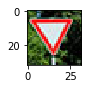

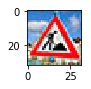

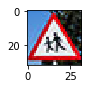

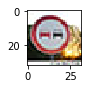

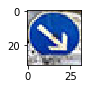

In [18]:
### Load the images and plot them here.


img = []
img.append(cv2.imread('newpics/Sign1.jpg', -1))
img.append(cv2.imread('newpics/Sign2.jpg', -1))
img.append(cv2.imread('newpics/Sign3.jpg', -1))
img.append(cv2.imread('newpics/Sign4.jpg', -1))
img.append(cv2.imread('newpics/Sign5.jpg', -1))
img = np.asarray(img)
labels = [13, 25, 28, 9, 38]

index = 0
for image in img:
    
    plt.figure(figsize=(1,1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    index += 1


img_gray = np.sum(img/3, axis=3, keepdims=True)
img_norm = (img_gray - 128)/128
img = img_norm


## The submission includes five new German Traffic signs found on the web, and the images are visualized. Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify

The chosen images were selected from Google Image search results. The pictures are bright, sunny, clear examples of the respective traffic signs. I don't expect the neural network to be 100% accurate since it was trained by a student but I also do not expect it to score a 0%. Its possible that the no passing sign could be confused for a speed limit sign due to the similarity in shapes. I do not expect background objects to have any effect in this test since the signs are very prominent in the photos

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('AlexNet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(img, labels, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./AlexNet
Test Accuracy = 0.600


## The submission documents the performance of the model when tested on the captured images. The performance on the new images is compared to the accuracy results of the test set.

The model was able to correctly classify 3 of the 5 images that I found on the internet. The results are lower than what was seen in the test set, but this was a statistically small sample size so I still believe the model performs well. I would be curious to see if with a very large(100M)sample whether the model would still hold an accuracy of 93.5%. This would closely mimic what a nueral network would see in the real world, lots of random never before seen data. Even if passing through a the same road, variables are always different such as weather, lighting, reflections, nearby objects. There are infinite ways for the signs to change. I can understand why google is logging millions of miles with their cars :)

        Expected        Predicted
        Yield           Yield
        Road Work       Road Work
        Children        Crossing Dangerous Curve to the right
        No passing      Roundabout mandatory
        Keep Right      Keep Right




### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k =5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_softmax_logits = sess.run(softmax, feed_dict={x: img, keep_prob: 1.0})
    test_top_k = sess.run(top_k, feed_dict={x: img, keep_prob: 1.0})
    
print(test_top_k)

INFO:tensorflow:Restoring parameters from .\AlexNet
TopKV2(values=array([[1.00000000e+00, 1.69273208e-16, 1.20462569e-22, 8.53887400e-25,
        5.31405647e-25],
       [9.99999523e-01, 4.73220666e-07, 2.68320033e-08, 5.52531736e-11,
        2.35162827e-11],
       [4.54805285e-01, 2.12583750e-01, 1.76353291e-01, 1.18328489e-01,
        1.31788235e-02],
       [9.74245787e-01, 1.06732529e-02, 5.37239481e-03, 3.49000958e-03,
        1.89451163e-03],
       [1.00000000e+00, 4.82244210e-11, 9.45063472e-12, 4.06057973e-14,
        1.12977268e-16]], dtype=float32), indices=array([[13,  2, 15, 39,  9],
       [25, 31, 22,  3, 29],
       [20, 18, 28, 29, 11],
       [40,  0,  5,  1, 34],
       [38, 13,  2, 14,  1]]))


   ## The top five softmax probabilities of the predictions on the captured images are outputted. The submission discusses how certain or uncertain the model is of its predictions.
        
        For the first image 
        
        Expected        Predicted
        Yield           Yield(100%), speed limit 30, No vehicles, keep left, No passing
        
        For the second image 
        
        Expected        Predicted
        Road Work       Road Work(99.99%), Wild Animals, Bumpy road, speed limit 60, Bicycles crossing
        
        For the third image 
        
        Expected        Predicted
        Children        Crossing Dangerous Curve to the right(45.48%), General caution(21.26%), Children crossing(17.64%),       Bicycles crossing(11.83%), Rightofway(1.3%)
        
        For the fourth image 
        
        Expected        Predicted
        No passing      Roundabout mandatory(97.4%), speed limit 20(1.067%), speed limit 80(.537%), speed limit 30(.349%), turn left ahead(.189%)
        
        For the fifth image 
        
        Expected        Predicted
        Keep Right      Keep Right(100%), yield, speed limit 50, stop, speed limit 30

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")